50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
===========================exp 1============================
MSE: 33787285.4143, MAE: 4728.4770, R²: 0.7747
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
===========================exp 1============================
MSE: 33935248.2817, MAE: 4732.2158, R²: 0.7688
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
===========================exp 2============================
MSE: 21058280.1523, MAE: 3507.9537, R²: 0.8565


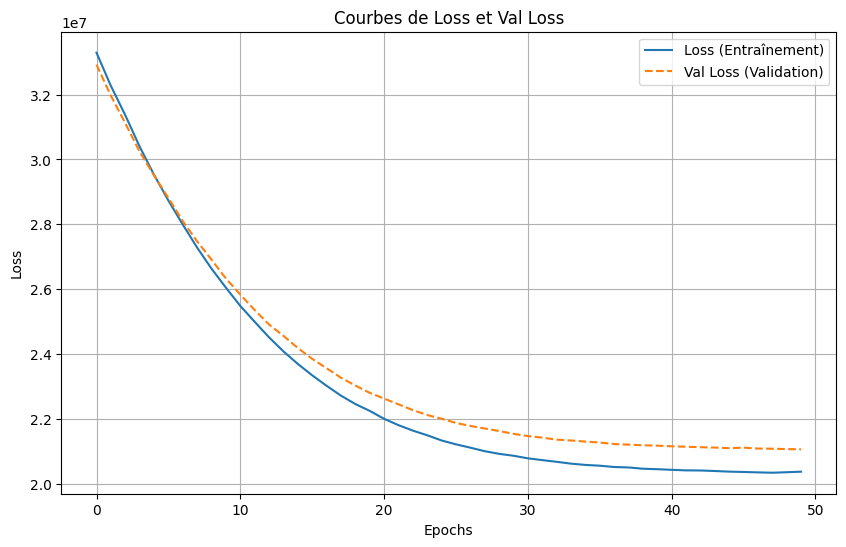

In [1]:
from modules.preprocess import preprocessing, split
from modules.evaluate import evaluate_performance
from modules.print_draw import print_data, draw_loss
from models.models import create_nn_model, train_model, model_predict
import pandas as pd
import joblib
from os.path import join as join
# Chargement des datasets
df_old = pd.read_csv(join('data','df_old.csv'))

# Charger le préprocesseur
preprocessor_loaded = joblib.load(join('models','preprocessor.pkl'))

# preprocesser les data
X, y, _ = preprocessing(df_old)

# split data in train and test dataset
X_train, X_test, y_train, y_test = split(X, y)

# # create a new model 
# model = create_nn_model(X_train.shape[1])

# # entraîner le modèle
# model, hist = train_model(model, X_train, y_train, X_val=X_test, y_val=y_test)
# draw_loss(hist)

# # sauvegarder le modèle
# joblib.dump(model, join('models','model_2024_08.pkl'))

# charger le modèle
model_2024_08 = joblib.load(join('models','model_2024_08.pkl'))

#%% predire sur les valeurs de train
y_pred = model_predict(model_2024_08, X_train)

# mesurer les performances MSE, MAE et R²
perf = evaluate_performance(y_train, y_pred)  

print_data(perf)

#%% predire sur les valeurs de tests
y_pred = model_predict(model_2024_08, X_test)

# mesurer les performances MSE, MAE et R²
perf = evaluate_performance(y_test, y_pred)   

print_data(perf)

#%% WARNING ZONE on test d'entrainer le modèle plus longtemps mais sur les mêmes données
model2, hist2 = train_model(model_2024_08, X_train, y_train, X_val=X_test, y_val=y_test)
y_pred = model_predict(model_2024_08, X_test)
perf = evaluate_performance(y_test, y_pred)  
print_data(perf, exp_name="exp 2")
draw_loss(hist2)

# Tests Ml Flows



1

In [4]:
dict = {'nom':['Cortier'], 'prenom':['Jean'], 'age':[42]}
df = pd.DataFrame(dict)
df

,nom,prenom,age
0,Cortier,Jean,42
